Made some mistakes in the other notebooks, will doing PCA on all the hbd sets here.

In [1]:
#importing libraries
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import pubchempy as pcp
import requests
import json
import sys

In [2]:
#helping make the seaborn plots prettier
sns.set(rc={'figure.figsize': (10, 10), "figure.dpi":300, 'savefig.dpi':300, "font.weight": "bold"})
sns.set(font_scale=2.5)
sns.set_style('whitegrid')

Reading in all hbd data sets 

In [3]:
#nist dataset
webscraped_hbd = pd.read_csv('../pubchem/webscrapped_hbd.csv')

In [4]:
webscraped_hbd

HBD    CID
0                     urea   1176
1                 glycerol    753
2        propanedioic acid    867
3       triethylene glycol   8172
4           1,2-ethanediol    174
..                     ...    ...
70             oxalic acid    971
71               sulfolane  31347
72          diethanolamine   8113
73  perfluorodecanoic acid   9555
74     trifluoroacetamide   67717

[75 rows x 2 columns]

Need smiles for this set

In [5]:
#adding path to pubchem folder which contains the get_properties function
sys.path.insert(0,'../pubchem/')

In [6]:
from get_properties import get_properties

In [7]:
webscraped_hbd = get_properties(webscraped_hbd, 'canonical_smiles', 'CID', 'HBD_' )

In [8]:
webscraped_hbd

HBD    CID  \
0                     urea   1176   
1                 glycerol    753   
2        propanedioic acid    867   
3       triethylene glycol   8172   
4           1,2-ethanediol    174   
..                     ...    ...   
70             oxalic acid    971   
71               sulfolane  31347   
72          diethanolamine   8113   
73  perfluorodecanoic acid   9555   
74     trifluoroacetamide   67717   

                                  HBD_CanonicalSMILES  
0                                           C(=O)(N)N  
1                                          C(C(CO)O)O  
2                                     C(C(=O)O)C(=O)O  
3                                        C(COCCOCCO)O  
4                                              C(CO)O  
..                                                ...  
70                                     C(=O)(C(=O)O)O  
71                                    C1CCS(=O)(=O)C1  
72                                          C(CO)NCCO  
73  C(=O)(C(C(C(C(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)...  
74                                   C(=O)(C(F)(F)F)N  

[75 rows x 3 columns]

In [9]:
#Expanded dataset afetr retrieving similar compounds from pubchem
similar_hbd = pd.read_csv('../pubchem/similar_compiled_HBD.csv')

In [10]:
similar_hbd

HBD_cid                                         HBD_smiles
0            1176                                          C(=O)(N)N
1        11457650                                          C(=O)(N)N
2          636363                                          C(=O)(N)N
3          101721                                       C(=O)(N)N.Cl
4        53411231                                       C(=O)(N)N.Br
...           ...                                                ...
106347  140525106  C(=O)(C(C(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)F...
106348  141328666    CCC(C(C(C(C(C(C(=O)O)(F)F)(F)F)(F)F)(F)F)(F)F)F
106349  146481193              C(CCCCCCCCCCC(=O)O)CCCCCCCCCCC(F)(F)F
106350  146517399                                 C(CCC(F)F)CCC(=O)O
106351  146625573           C(C(C(C(C(F)(F)F)F)F)F)(C(C(C(=O)O)F)F)F

[106352 rows x 2 columns]

In [11]:
#basis set after applying engineering metrics
basis_hbd = pd.read_csv('../pubchem/HBD_basis_set.csv')

In [12]:
basis_hbd

HBD_cid                        HBD_smiles  Vendor Status  \
0         1176                         C(=O)(N)N           True   
1       522583                            CC(N)O           True   
2     71309146                            CC(C)O           True   
3     12213345                            CC(C)O           True   
4     11182567                           CC(=O)O           True   
...        ...                               ...            ...   
3472       785                   C1=CC(=CC=C1O)O           True   
3473      8425  C1=CC=C(C=C1)CC2=C(C=CC(=C2)Cl)O           True   
3474       460                    COC1=CC=CC=C1O           True   
3475       300                       C(C(=O)O)Cl           True   
3476       289                 C1=CC=C(C(=C1)O)O           True   

                                               GHS_info  Health Score  \
0               Not classified as a hazardous substance             0   
1                                      ['H315', 'H319']            20   
2                              ['H225', 'H319', 'H336']            60   
3                              ['H225', 'H319', 'H336']            60   
4                              ['H226', 'H312', 'H314']            75   
...                                                 ...           ...   
3472  ['H302', 'H317', 'H318', 'H341', 'H351', 'H400...           705   
3473  ['H315', 'H317', 'H318', 'H332', 'H351', 'H361...           535   
3474  ['H302', 'H315', 'H319', 'H317', 'H350', 'H360...           695   
3475  ['H301', 'H311', 'H314', 'H331', 'H400', 'H311...           825   
3476  ['H301', 'H311', 'H315', 'H319', 'H341', 'H350...           870   

      SCALED Health  HEALTH PI  Environmental Score  SCALED ENV     ENV PI  \
0        100.000000  55.000000                    0  100.000000  18.000000   
1         97.701149  53.735632                    0  100.000000  18.000000   
2         93.103448  51.206897                    0  100.000000  18.000000   
3         93.103448  51.206897                    0  100.000000  18.000000   
4         91.379310  50.258621                    0  100.000000  18.000000   
...             ...        ...                  ...         ...        ...   
3472      18.965517  10.431034                  200   42.857143   7.714286   
3473      38.505747  21.178161                  275   21.428571   3.857143   
3474      20.114943  11.063218                  250   28.571429   5.142857   
3475       5.172414   2.844828                  200   42.857143   7.714286   
3476       0.000000   0.000000                  125   64.285714  11.571429   

                     HBD_InChIKey HBD_MolecularFormula  HBD_MolecularWeight  \
0     XSQUKJJJFZCRTK-UHFFFAOYSA-N               CH4N2O               60.056   
1     UJPKMTDFFUTLGM-UHFFFAOYSA-N               C2H7NO               61.080   
2     KFZMGEQAYNKOFK-VMIGTVKRSA-N                C3H8O               63.073   
3     KFZMGEQAYNKOFK-FIBGUPNXSA-N                C3H8O               63.110   
4     QTBSBXVTEAMEQO-ZDOIIHCHSA-N               C2H4O2               62.037   
...                           ...                  ...                  ...   
3472  QIGBRXMKCJKVMJ-UHFFFAOYSA-N               C6H6O2              110.110   
3473  NCKMMSIFQUPKCK-UHFFFAOYSA-N            C13H11ClO              218.680   
3474  LHGVFZTZFXWLCP-UHFFFAOYSA-N               C7H8O2              124.140   
3475  FOCAUTSVDIKZOP-UHFFFAOYSA-N             C2H3ClO2               94.500   
3476  YCIMNLLNPGFGHC-UHFFFAOYSA-N               C6H6O2              110.110   

      SCALED MW      MW PI      HBD_mp   TOTAL PI  RANK  
0     99.990009  26.997303         132  99.997303     1  
1     98.313687  26.544695  no mp data  98.280328     2  
2     95.207141  25.705928  no mp data  94.912825     3  
3     95.151323  25.690857  no mp data  94.897754     4  
4     96.797073  26.135210  no mp data  94.393830     5  
...         ...        ...         ...        ...   ...  
3472  54.536373  14.724821    170

Here are the functions we will define that will create "fingerprints" for the chemicals. These fingerprints are sort of a way to digitize the chemical structure so this way we can look at similarities/differences and visualize them on plots. The SMILES string will be used to grab the fingerprints from rdkit.

In [13]:
def fp_list_from_smiles_list(smiles_list,n_bits=2048):
    fp_list = []
    for smiles in tqdm(smiles_list):
        mol = Chem.MolFromSmiles(smiles)
        if mol == None:                  #added this in to skip None as they returned sometimes in the line before
            pass
        else:
            fp_list.append(fp_as_array(mol,n_bits))
    return fp_list

def fp_as_array(mol,n_bits=2048):
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=n_bits)
    arr = np.zeros((1,), np.int)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

Grabbing the fingerprints

In [14]:
#webscrapped set
web_hbd_fp_list = fp_list_from_smiles_list(webscraped_hbd.HBD_CanonicalSMILES)

#expanded set
similar_hbd_fp_list = fp_list_from_smiles_list(similar_hbd.HBD_smiles)

#basis set
basis_hbd_fp_list = fp_list_from_smiles_list(basis_hbd.HBD_smiles)

  0%|          | 0/106352 [00:00<?, ?it/s]RDKit WARNING: [19:42:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:42:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:42:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:42:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:42:51] WARNING: not removing hydrogen atom without neighbors
  1%|          | 631/106352 [00:00<00:16, 6307.66it/s]RDKit WARNING: [19:42:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:42:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:42:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:42:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:42:51] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:42:51] WARNING: not removing hydrogen atom without neighbors
  1%|          | 1262/10

 10%|▉         | 10353/106352 [00:02<00:29, 3206.43it/s]RDKit WARNING: [19:42:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:42:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:42:54] WARNING: not removing hydrogen atom without neighbors
 10%|█         | 10728/106352 [00:02<00:28, 3356.98it/s]RDKit WARNING: [19:42:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:42:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:42:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:42:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:42:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:42:54] WARNING: not removing hydrogen atom without neighbors
 10%|█         | 11110/106352 [00:02<00:27, 3487.31it/s]RDKit WARNING: [19:42:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:42:54] WARNIN

 25%|██▌       | 27056/106352 [00:06<00:14, 5397.59it/s]RDKit WARNING: [19:42:58] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:42:58] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:42:58] WARNING: not removing hydrogen atom without neighbors
 26%|██▌       | 27604/106352 [00:06<00:15, 5238.88it/s]RDKit WARNING: [19:42:58] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:42:58] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:42:58] WARNING: not removing hydrogen atom without neighbors
 32%|███▏      | 33682/106352 [00:07<00:19, 3823.57it/s]RDKit WARNING: [19:42:59] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:42:59] WARNING: not removing hydrogen atom without neighbors
RDKit ERROR: [19:42:59] Explicit valence for atom # 1 Cl, 7, is greater than permitted
RDKit WARNING: [19:42:59] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:42:59]

 53%|█████▎    | 56596/106352 [00:12<00:12, 3983.95it/s]RDKit WARNING: [19:43:04] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:04] WARNING: not removing hydrogen atom without neighbors
 54%|█████▎    | 56997/106352 [00:12<00:13, 3792.19it/s]RDKit WARNING: [19:43:04] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:04] WARNING: not removing hydrogen atom without neighbors
 64%|██████▎   | 67738/106352 [00:15<00:10, 3596.32it/s]RDKit WARNING: [19:43:07] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:07] WARNING: not removing hydrogen atom without neighbors
 65%|██████▌   | 69129/106352 [00:16<00:08, 4289.45it/s]RDKit WARNING: [19:43:08] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:08] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:08] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:08] WARNING: not removing hydrogen

 74%|███████▍  | 79050/106352 [00:18<00:05, 4972.83it/s]RDKit WARNING: [19:43:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:10] WARNING: not removing hydrogen atom without neighbors
 76%|███████▌  | 80568/106352 [00:18<00:05, 4978.08it/s]RDKit WARNING: [19:43:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:10] WARNING: not removing hydrogen atom without neighbors
RDKit WA

RDKit WARNING: [19:43:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:11] WARNING: not removing hydrogen atom without neighbors
 81%|████████▏ | 86528/106352 [00:19<00:03, 5232.60it/s]RDKit WARNING: [19:43:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:11] WARNING: not removing hydrogen atom wi

 98%|█████████▊| 104385/106352 [00:24<00:00, 3927.53it/s]RDKit WARNING: [19:43:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:15] WARNING: not removing hydrogen atom without neighbors
 99%|█████████▊| 105001/106352 [00:24<00:00, 4587.39it/s]RDKit WARNING: [19:43:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:15] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:43:15] WARNING: not removing hydrogen atom without neighbors
100%|██████████| 3477/3477 [00:00<00:00, 4895.62it/s]


Creating the PCA variable, using 2048 bit fingerprint and 2 PC

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) 

Fitting the fingerprints to the PCA

In [16]:
#webscrapped set
web_hbd_crds = pca.fit_transform(web_hbd_fp_list)

#expanded set
similar_hbd_crds = pca.transform(similar_hbd_fp_list)  #take off "fit" so it uses components from first dataset

#basis set
basis_hbd_crds = pca.transform(basis_hbd_fp_list)

Saving into dataframes

In [17]:
#webscrapped set
web_hbd_crds_df = pd.DataFrame(web_hbd_crds,columns=["PC_1","PC_2"])

#expanded set
similar_hbd_crds_df = pd.DataFrame(similar_hbd_crds, columns=["PC_1","PC_2"])

#basis set
basis_hbd_crds_df = pd.DataFrame(basis_hbd_crds, columns=["PC_1","PC_2"])

Plotting

[(-3.0, 3.0)]

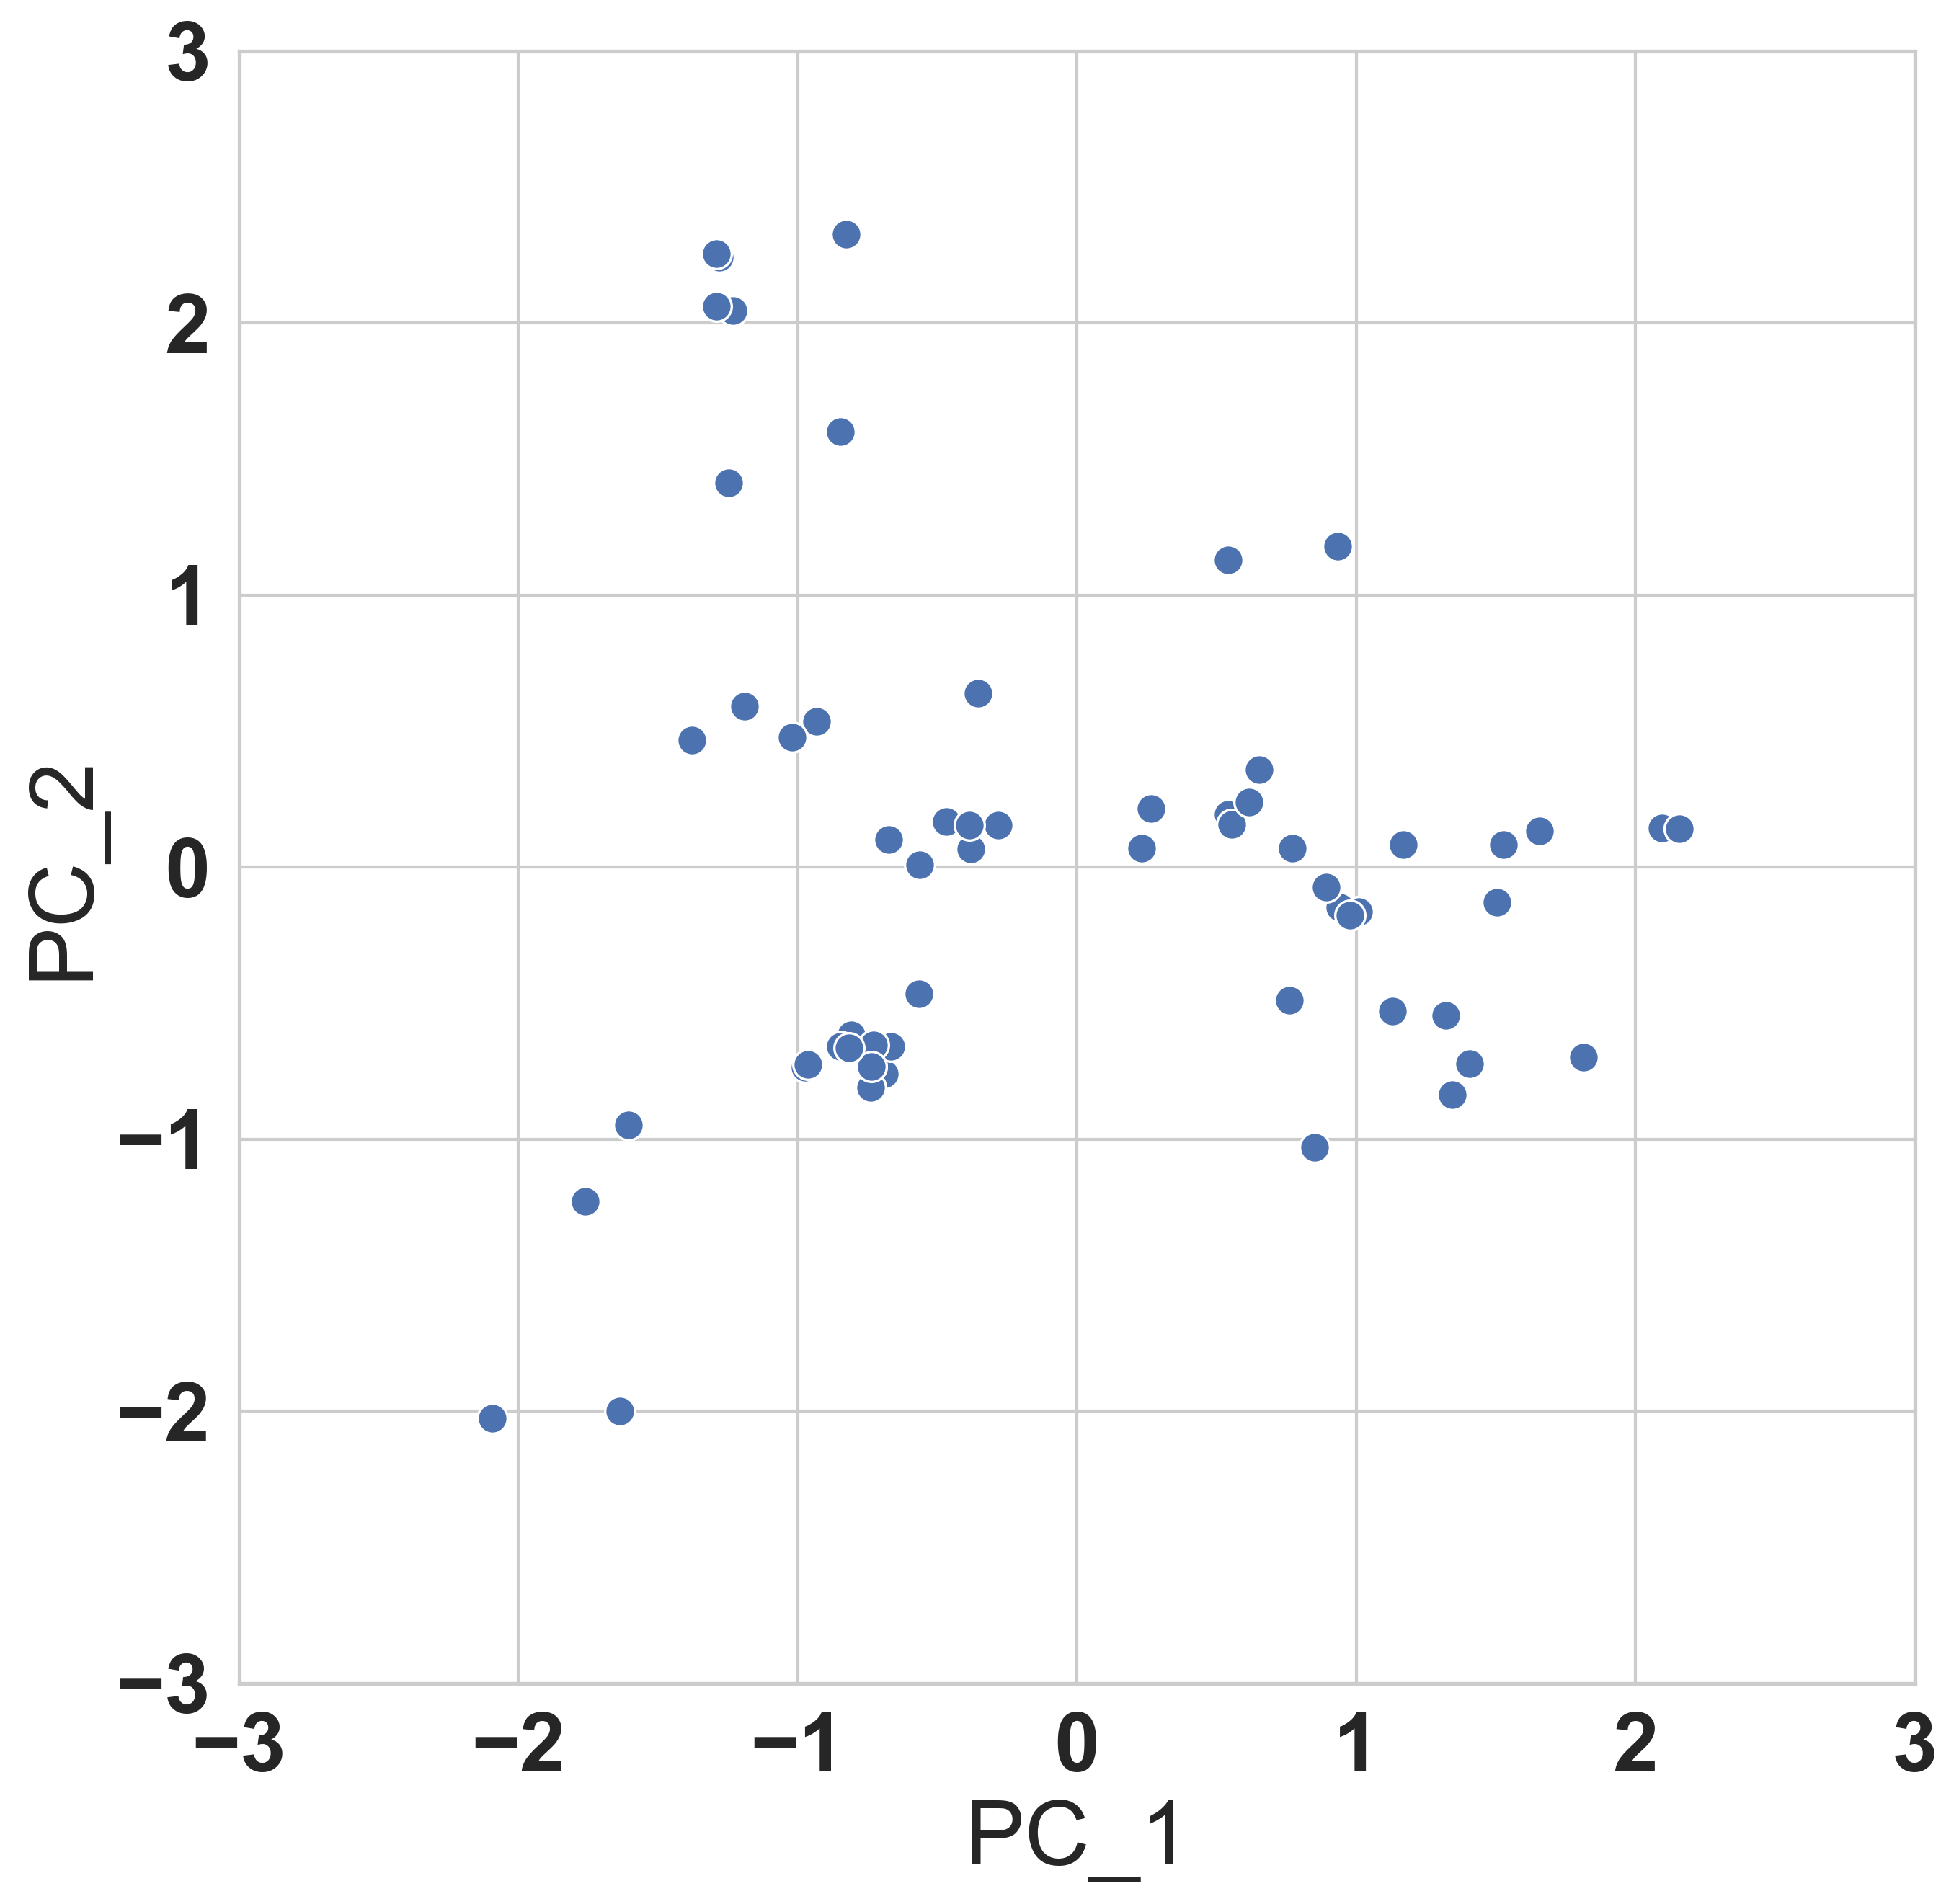

In [18]:
#webscrapped set

ax1 = sns.scatterplot(data=web_hbd_crds_df,x="PC_1",y="PC_2", s = 100, color = 'b')
ax1.set(ylim = (-3,3))
ax1.set(xlim = (-3,3))
#plt.show()
#plt.savefig('hbd_webscrapped_space_dissertation.png')

[(-3.0, 3.0)]

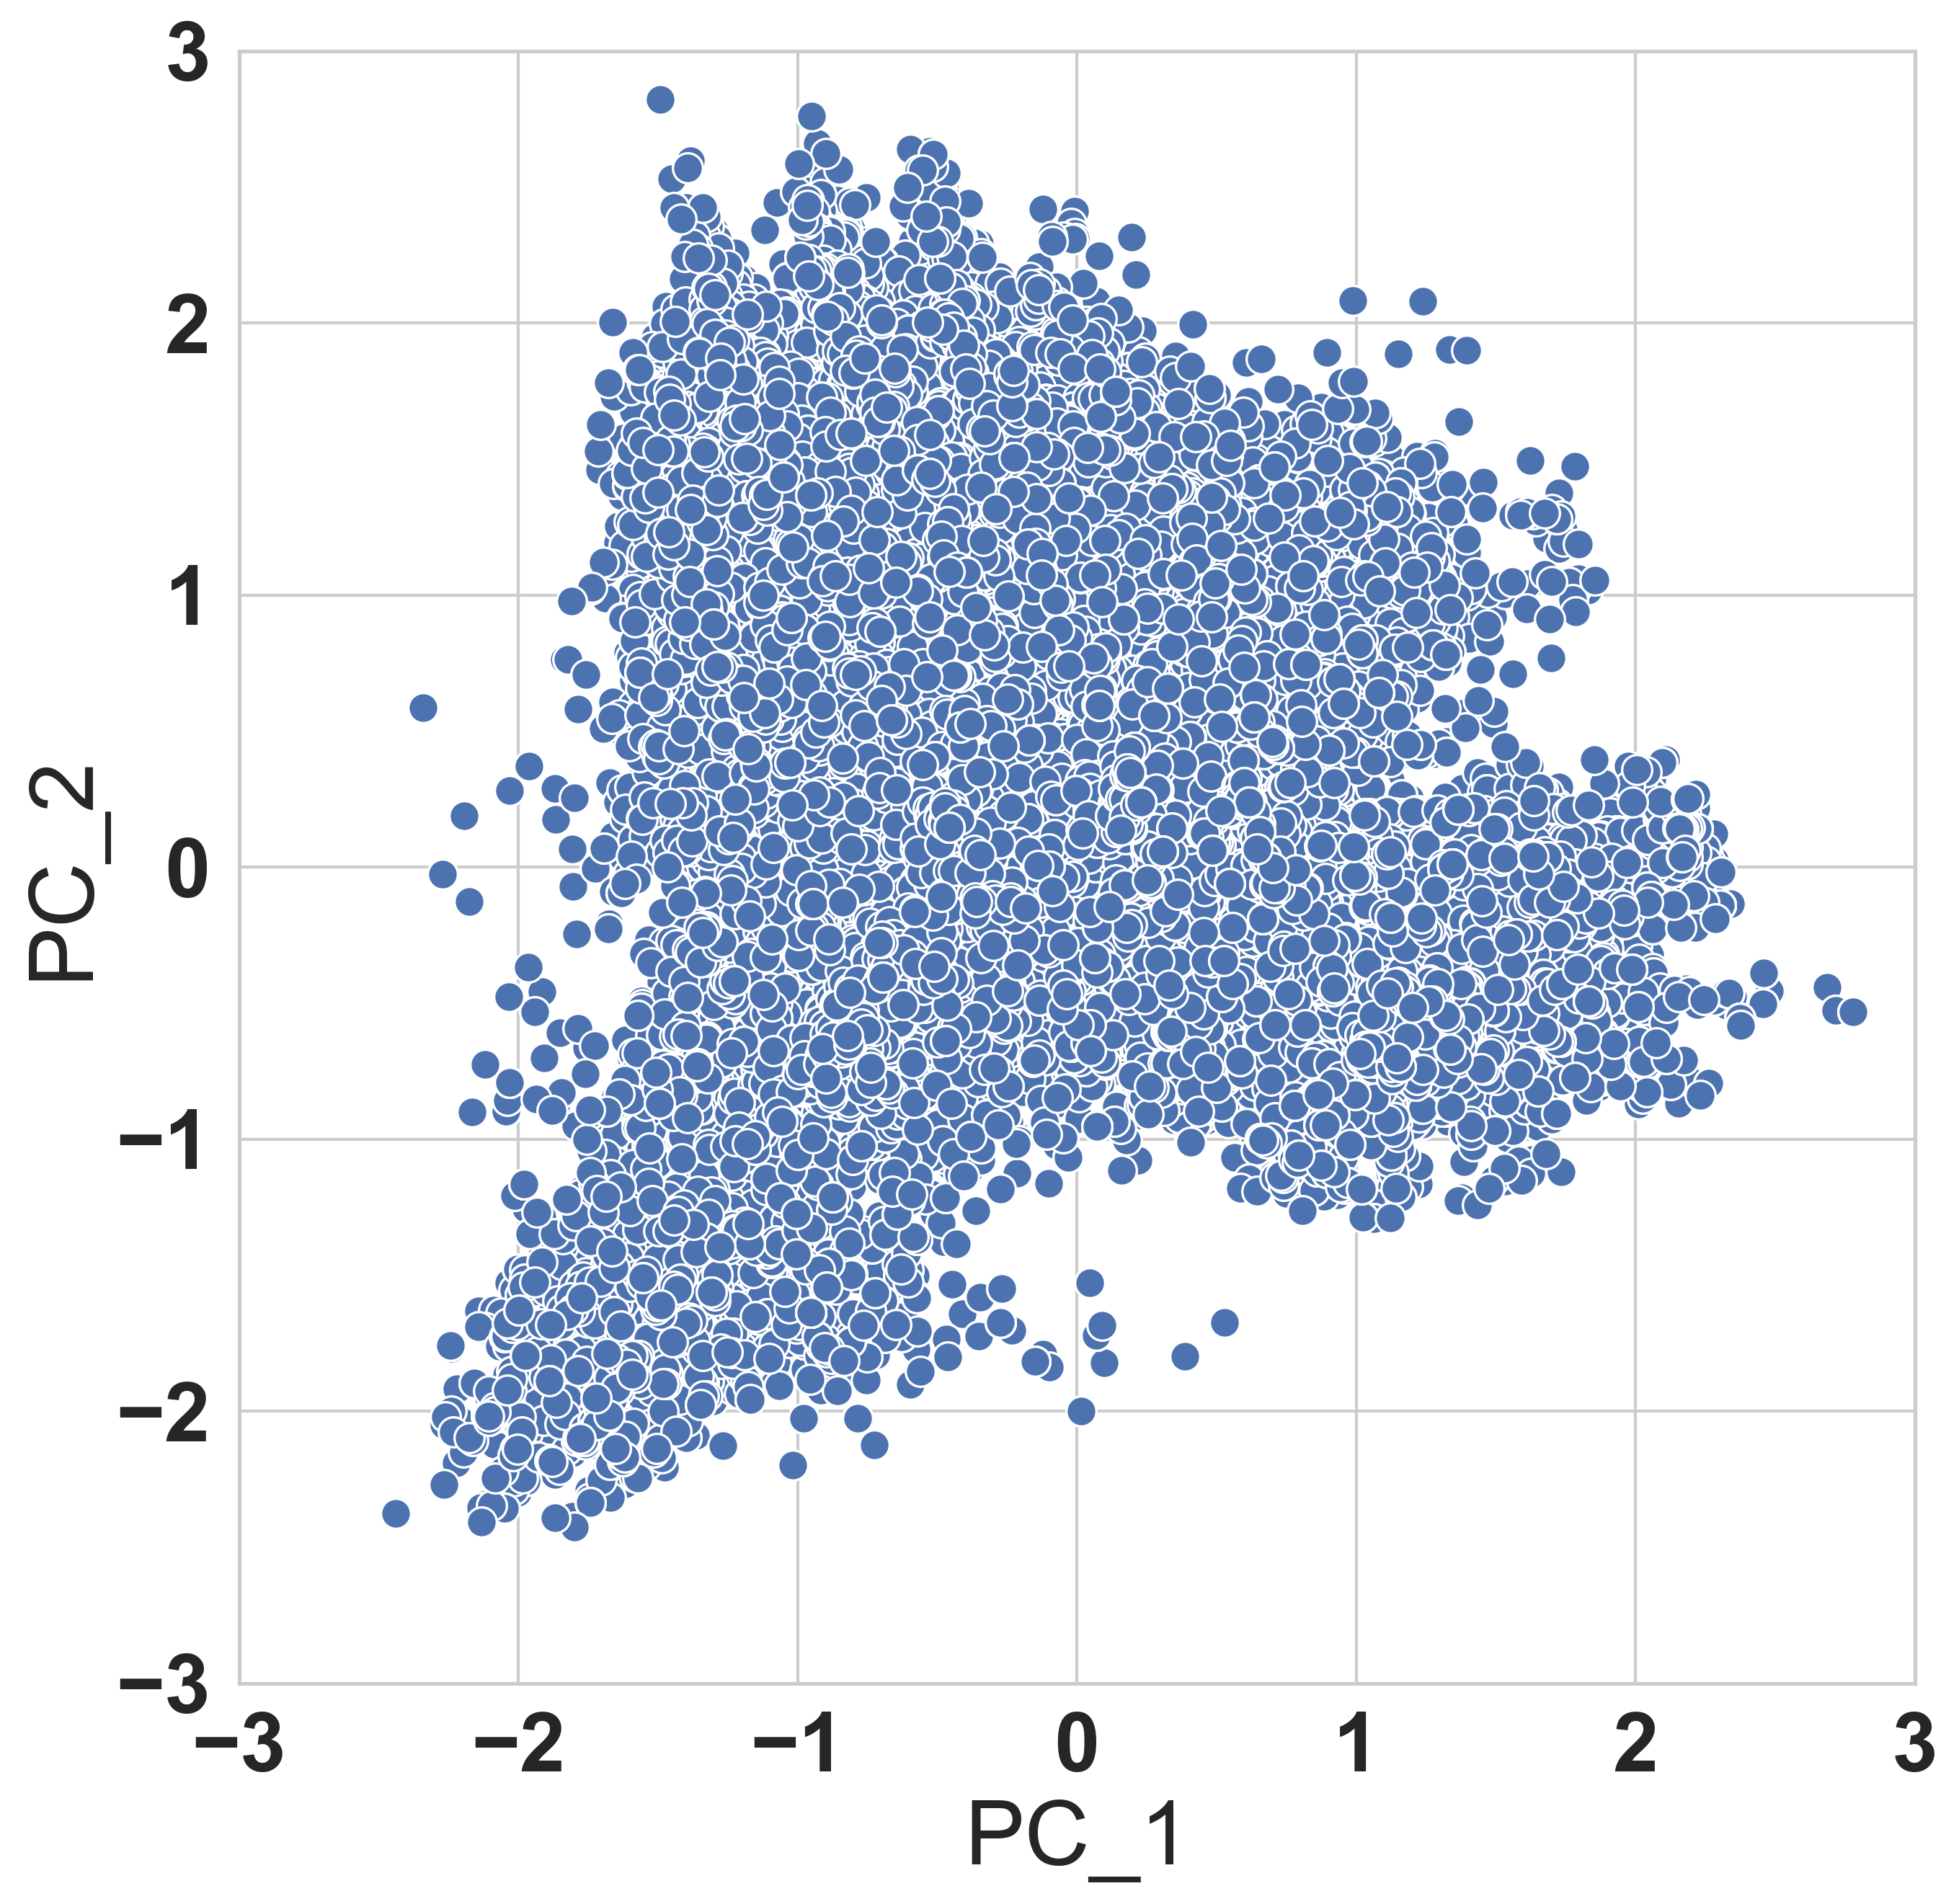

In [19]:
#expanded set
ax2 = sns.scatterplot(data=similar_hbd_crds_df,x="PC_1",y="PC_2", s = 100, color = 'b')
ax2.set(ylim = (-3,3))
ax2.set(xlim = (-3,3))
#plt.savefig('hbd_expanded_space_dissertation.png')
#plt.show()

[(-3.0, 3.0)]

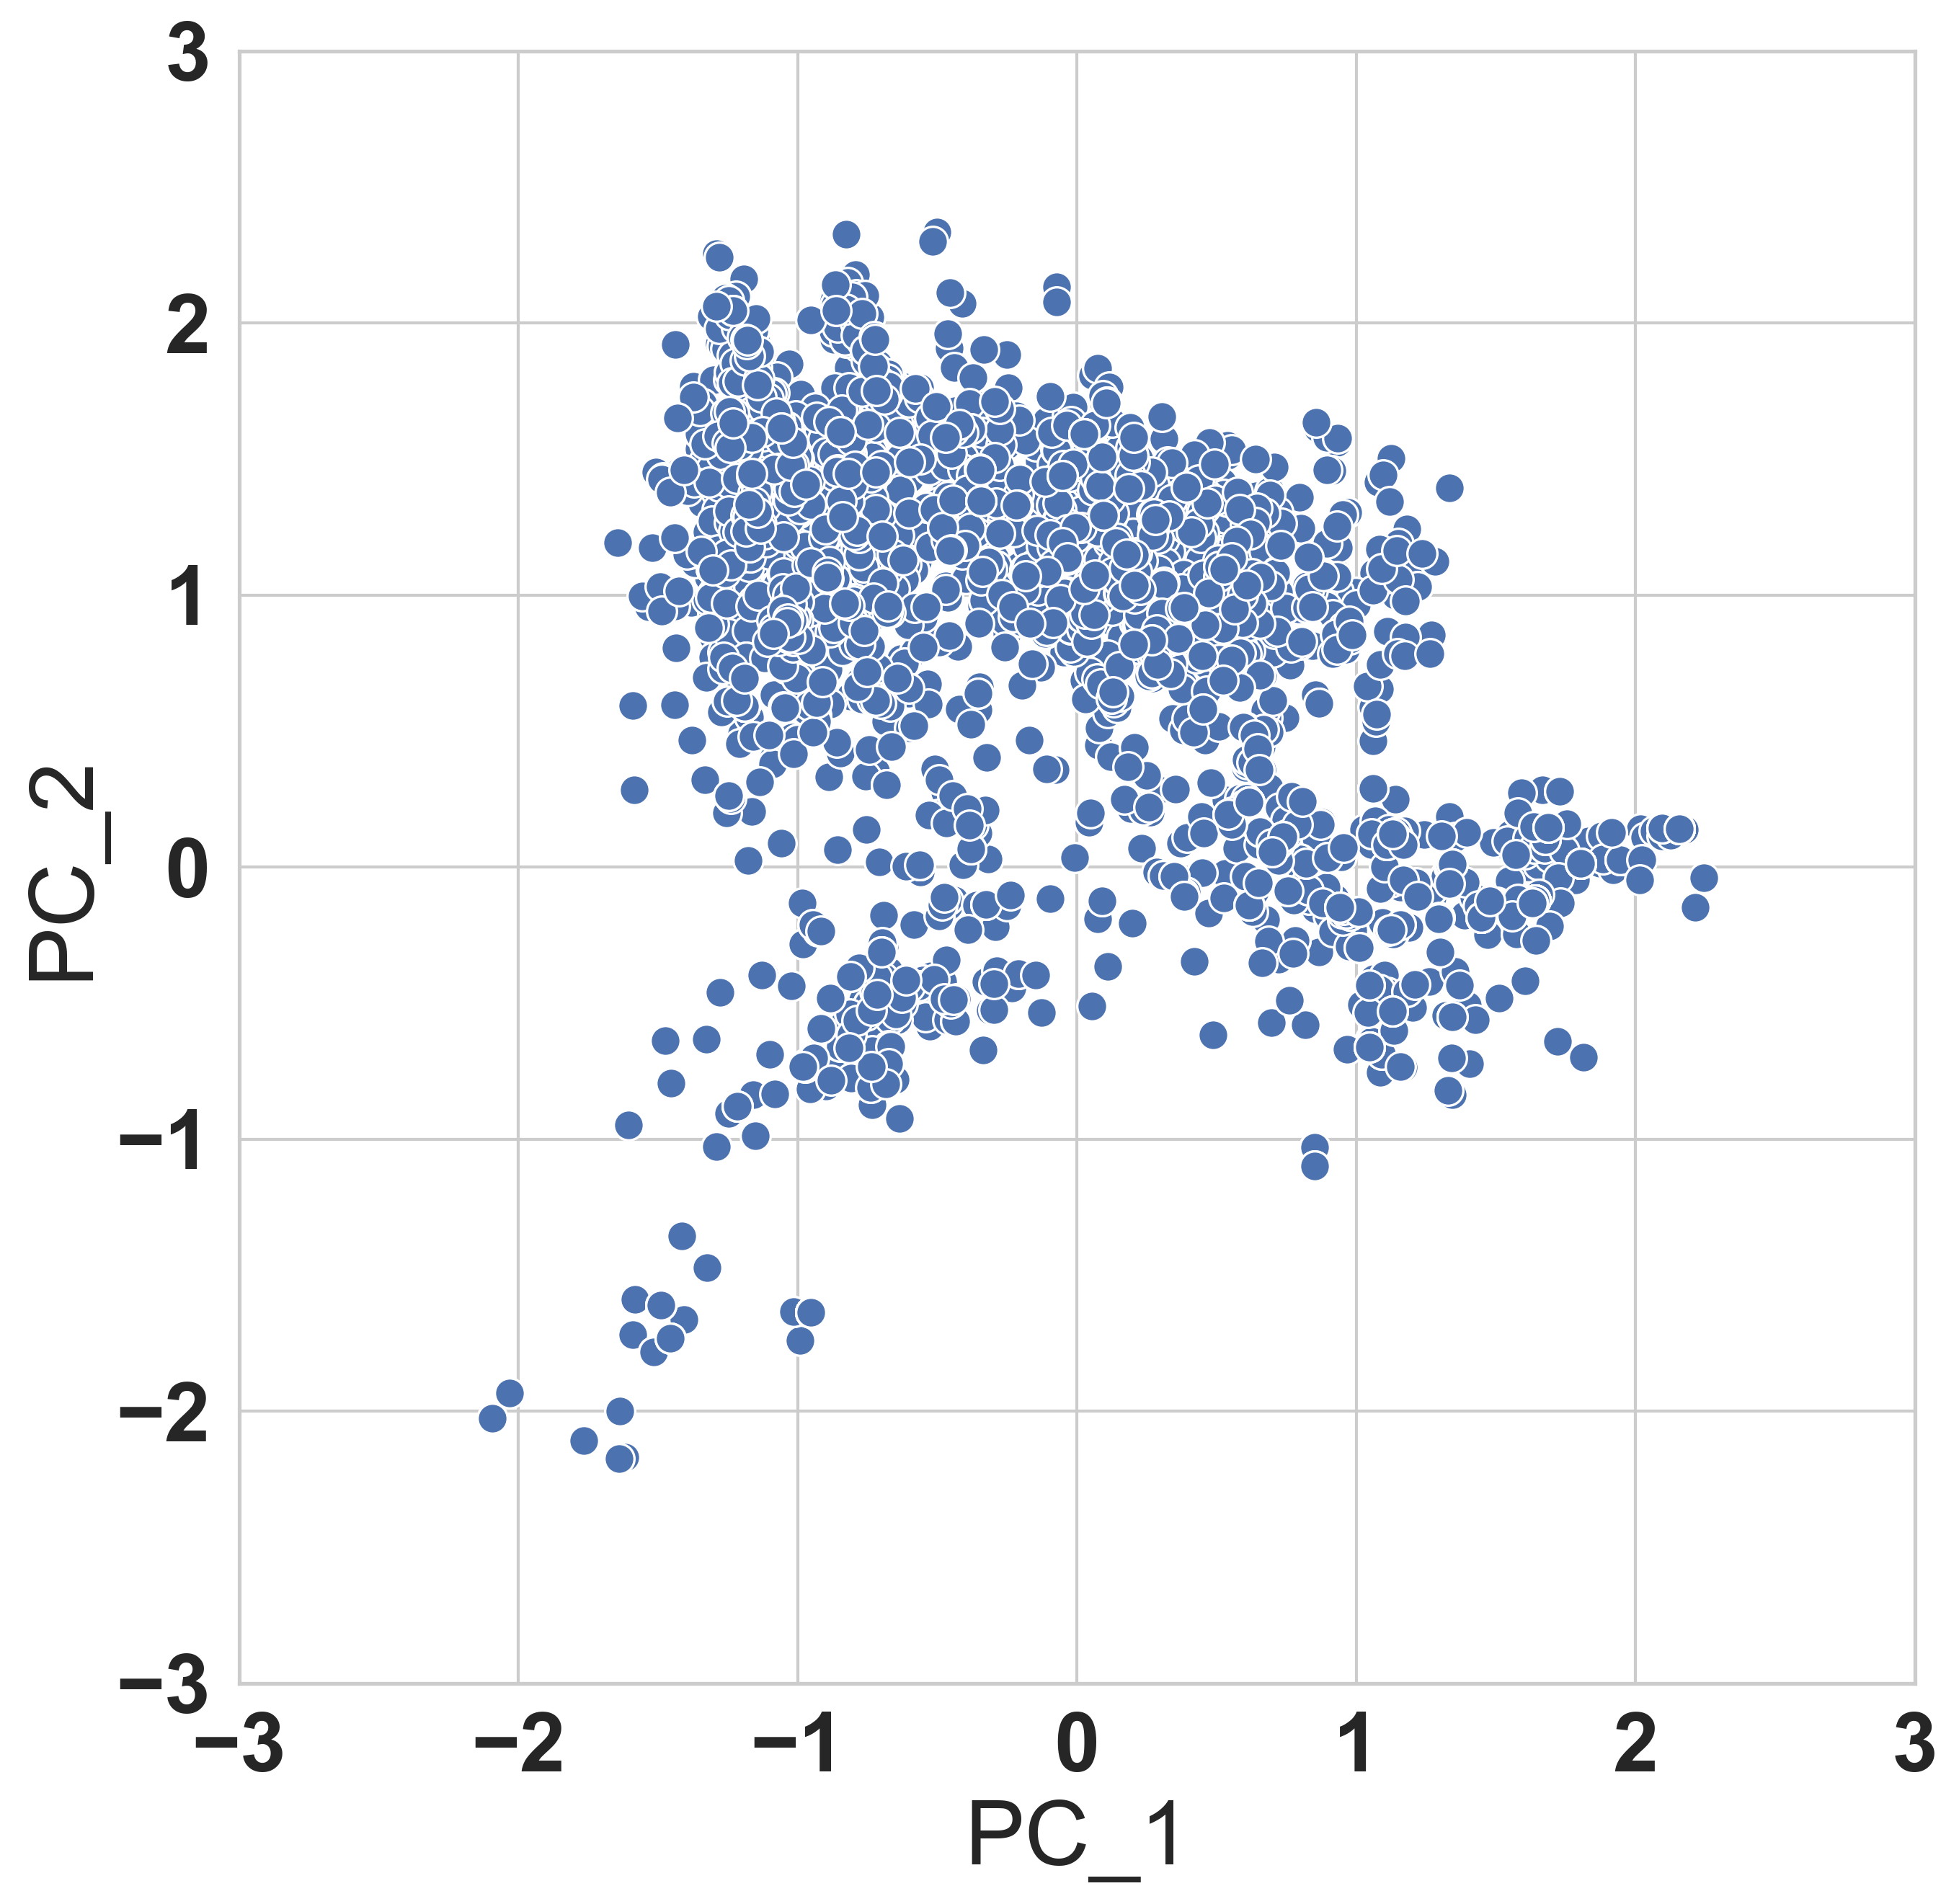

In [20]:
#basis_set
ax3 = sns.scatterplot(data=basis_hbd_crds_df,x="PC_1",y="PC_2", s = 100, color = 'b')
ax3.set(ylim = (-3,3))
ax3.set(xlim = (-3,3))
#plt.savefig('hbd_basis_space_dissertation.png')
#plt.show()

If we want to further anlyze the basis set plot by looking at the diversity of the candiates by their structures, we will need a better variance as currently it is at 20%.

In [21]:
var = np.sum(pca.explained_variance_ratio_)
var

0.20928956176476574

Let's se how the variance changes with the number of components.

In [22]:
def evaluate_components(fp_list):
    res = []
    for n_comp in tqdm(range(2,50)): 
        pca = PCA(n_components=n_comp)
        crds = pca.fit_transform(fp_list) 
        var = np.sum(pca.explained_variance_ratio_)
        res.append([n_comp,var])
    return res


In [23]:
# Run the function above on our fingerprint list
basis_hbd_comp_res = evaluate_components(basis_hbd_fp_list)

#Put these results into a dataframe
basis_hbd_res_df = pd.DataFrame(basis_hbd_comp_res,columns=["Components","Variance"])

#Make a line plot of the number of components vs the variance explained
ax4 = sns.lineplot(data=basis_hbd_res_df,x="Components",y="Variance")

100%|██████████| 48/48 [00:12<00:00,  3.98it/s]


Variance seems to level off after 50 components. We will make a new PCA with 50 principal components, and then use t-distributed stochastic neighbor embedding to reduce the dimensions.

In [24]:
hbd_pca = PCA(n_components=50)
hbd_crds = hbd_pca.fit_transform(basis_hbd_fp_list)

Use t-sne to reduce dimensions

In [25]:
from sklearn.manifold import TSNE
%time hbd_crds_embedded = TSNE(n_components=2).fit_transform(hbd_crds)

CPU times: user 1min 17s, sys: 845 ms, total: 1min 18s
Wall time: 22.4 s


In [26]:
#adding to df
hbd_tsne_df = pd.DataFrame(hbd_crds_embedded,columns=["X","Y"])
hbd_tsne_df.head()

X          Y
0  -4.162698  50.553558
1  17.462343  62.339508
2  17.144810  61.295284
3  17.150038  61.296604
4  -6.763387  50.534119

We can also add the ranking from the basis set after applying the engineering metrics performance. The dataset was already in order of ranking so the length of the fp list will give us the ranking.

In [27]:
len(basis_hbd_fp_list)

3477

In [28]:
basis_hbd_fp_rank = list(range(1, 3478))

In [29]:
hbd_tsne_df['rank'] = basis_hbd_fp_rank

In [30]:
hbd_tsne_df.head()

X          Y  rank
0  -4.162698  50.553558     1
1  17.462343  62.339508     2
2  17.144810  61.295284     3
3  17.150038  61.296604     4
4  -6.763387  50.534119     5

We can plot this out with a colorbar to show the ranking as well

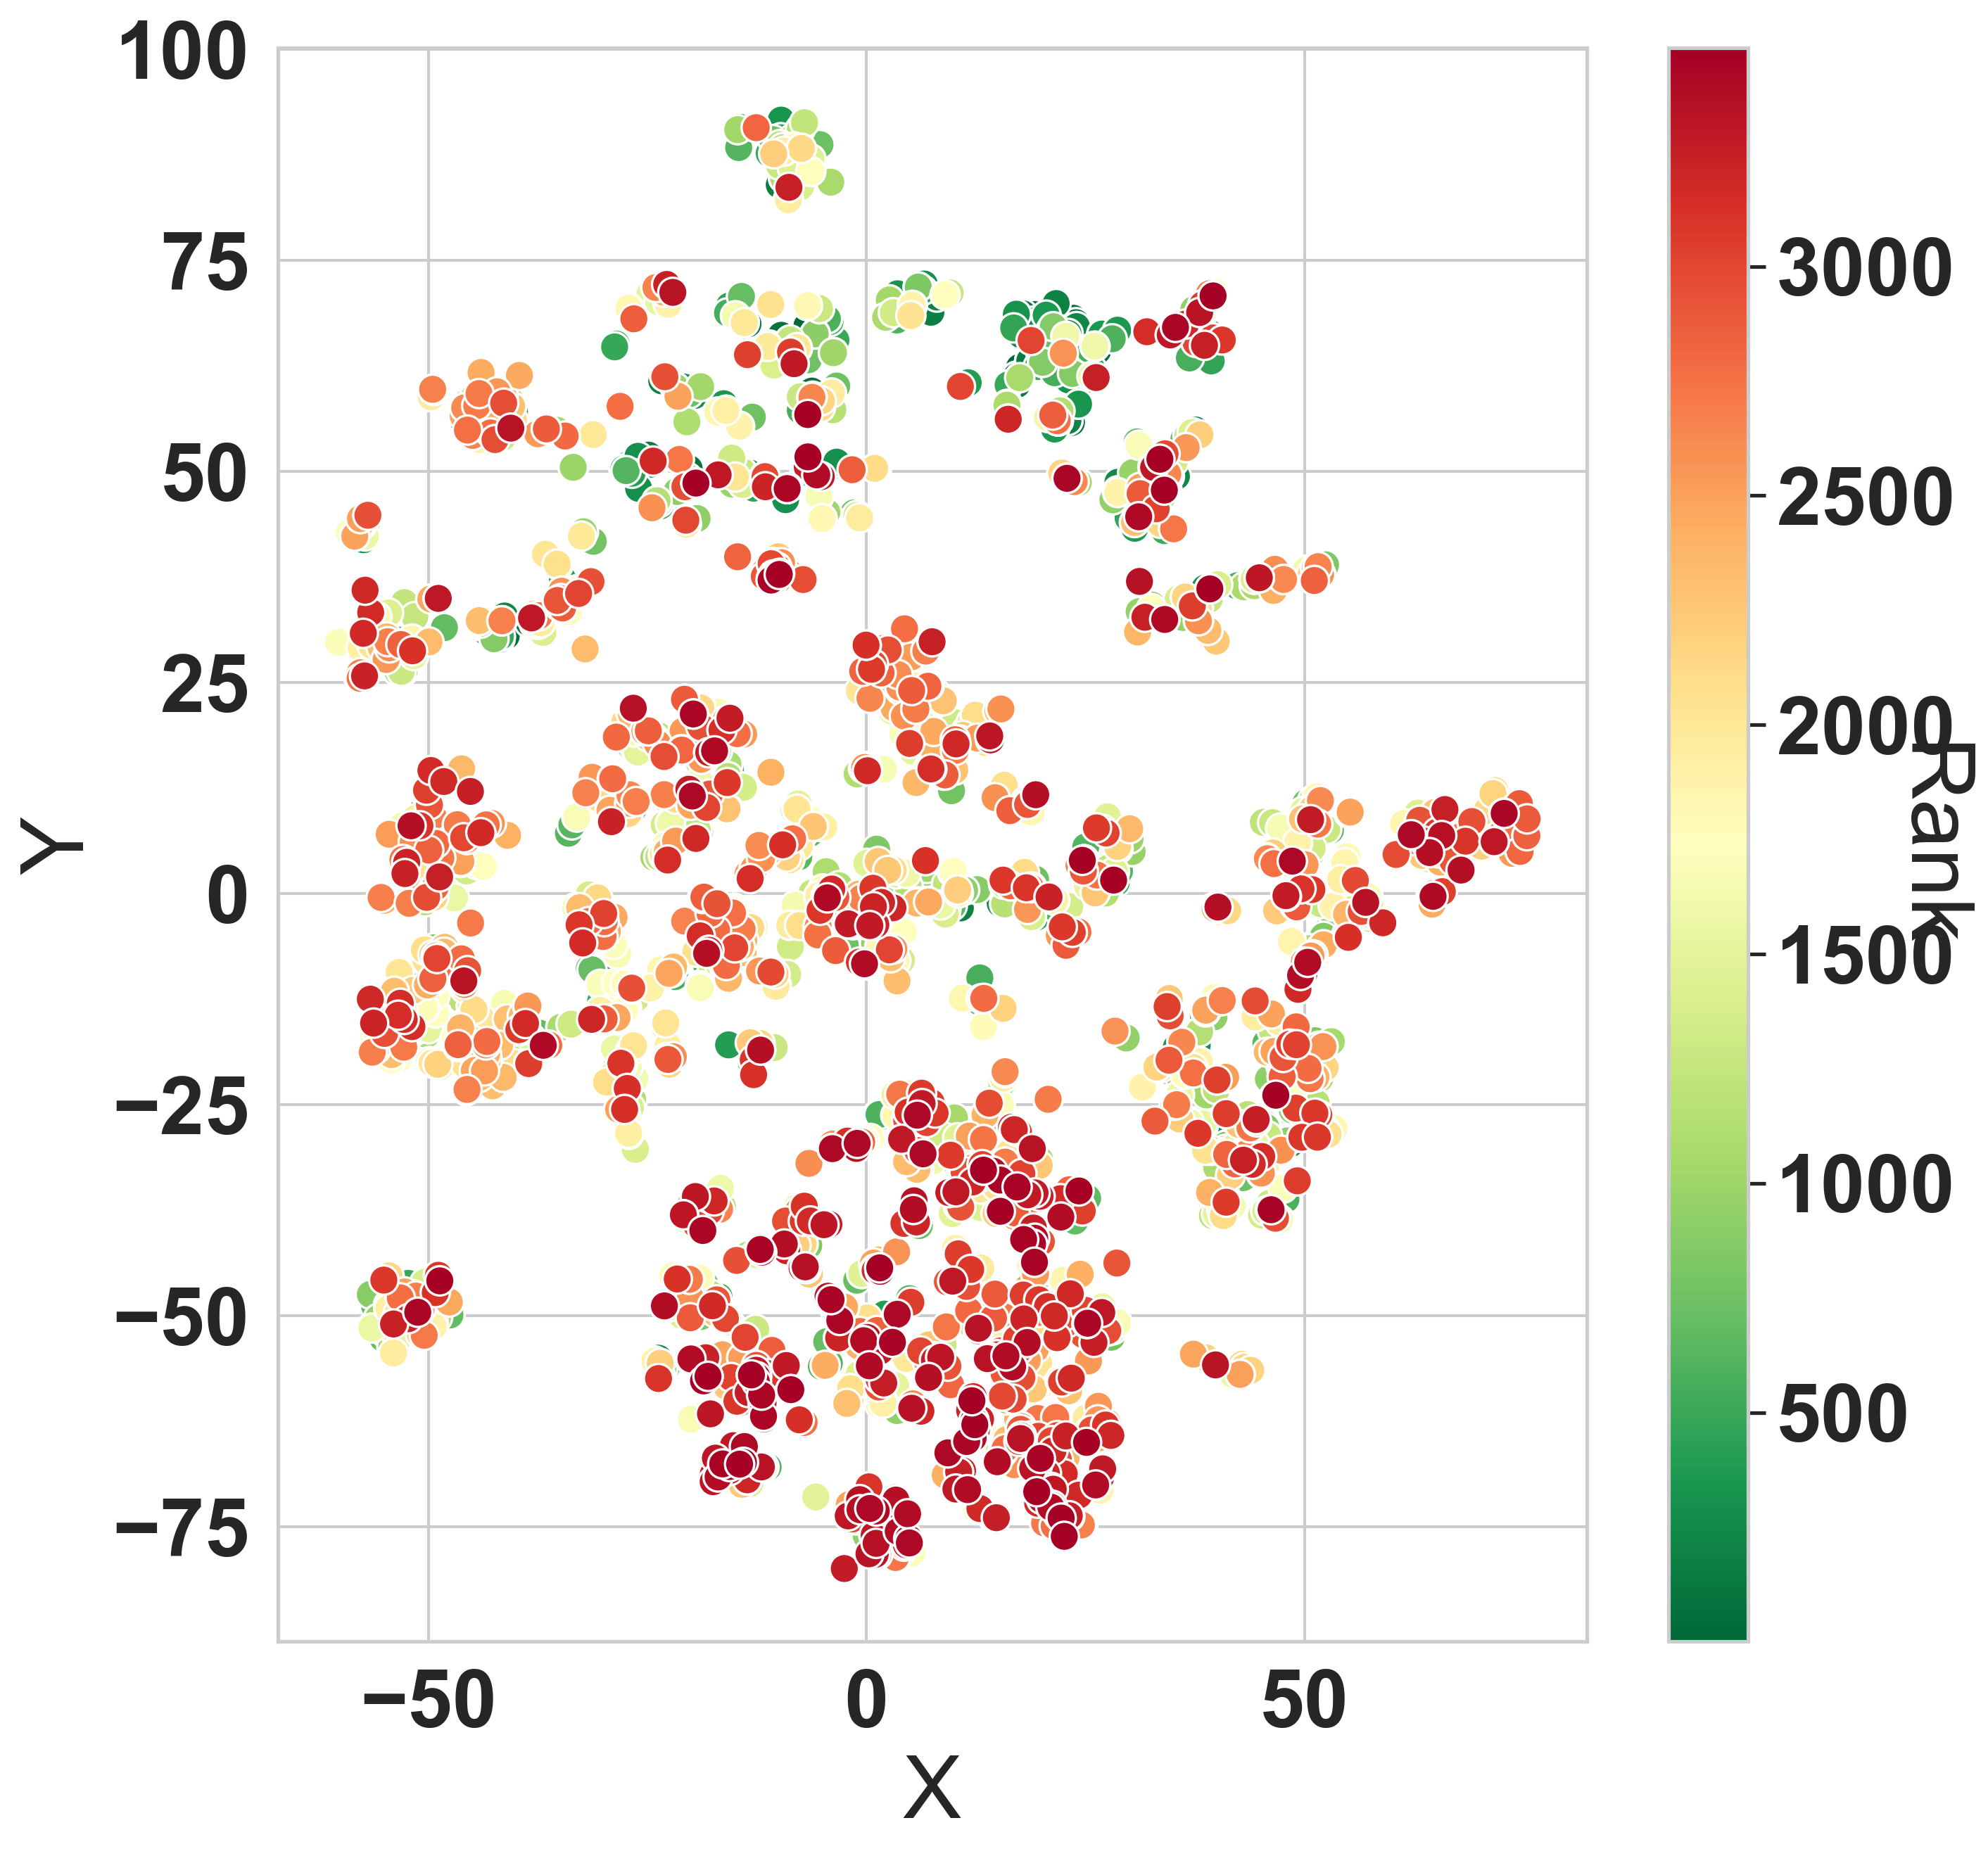

In [31]:
norm = plt.Normalize(basis_hbd['RANK'].min(), basis_hbd['RANK'].max())
sm = plt.cm.ScalarMappable(cmap="RdYlGn_r", norm=norm)

sm.set_array([])


ax = sns.scatterplot(data=hbd_tsne_df,x="X",y="Y", hue = 'rank', palette = "RdYlGn_r", legend = False, s = 100 )


cbar = plt.colorbar(sm)
cbar.set_label('Rank', rotation = 270)

#plt.savefig('hbd_basis_set_ranked.png')
plt.show()

In [32]:
#hbd_tsne_df.to_csv('hbd_tsne_df.csv', index = False)

You never get the same result twice with TSne, but I have the previous iterations aved, we can pull up the df and re plot that one

In [34]:
original_tsne_df = pd.read_csv('hbd_tsne_df.csv')

In [35]:
original_tsne_df

X          Y  rank
0    -34.911650  29.599580     1
1    -63.656920  16.410173     2
2    -62.669167  16.095873     3
3    -62.668095  16.095135     4
4    -32.310570  31.257702     5
...         ...        ...   ...
3472  53.596386 -13.284330  3473
3473  41.512047 -58.349007  3474
3474  -1.803376 -52.347510  3475
3475 -23.916872  39.326607  3476
3476  17.127975 -24.901980  3477

[3477 rows x 3 columns]

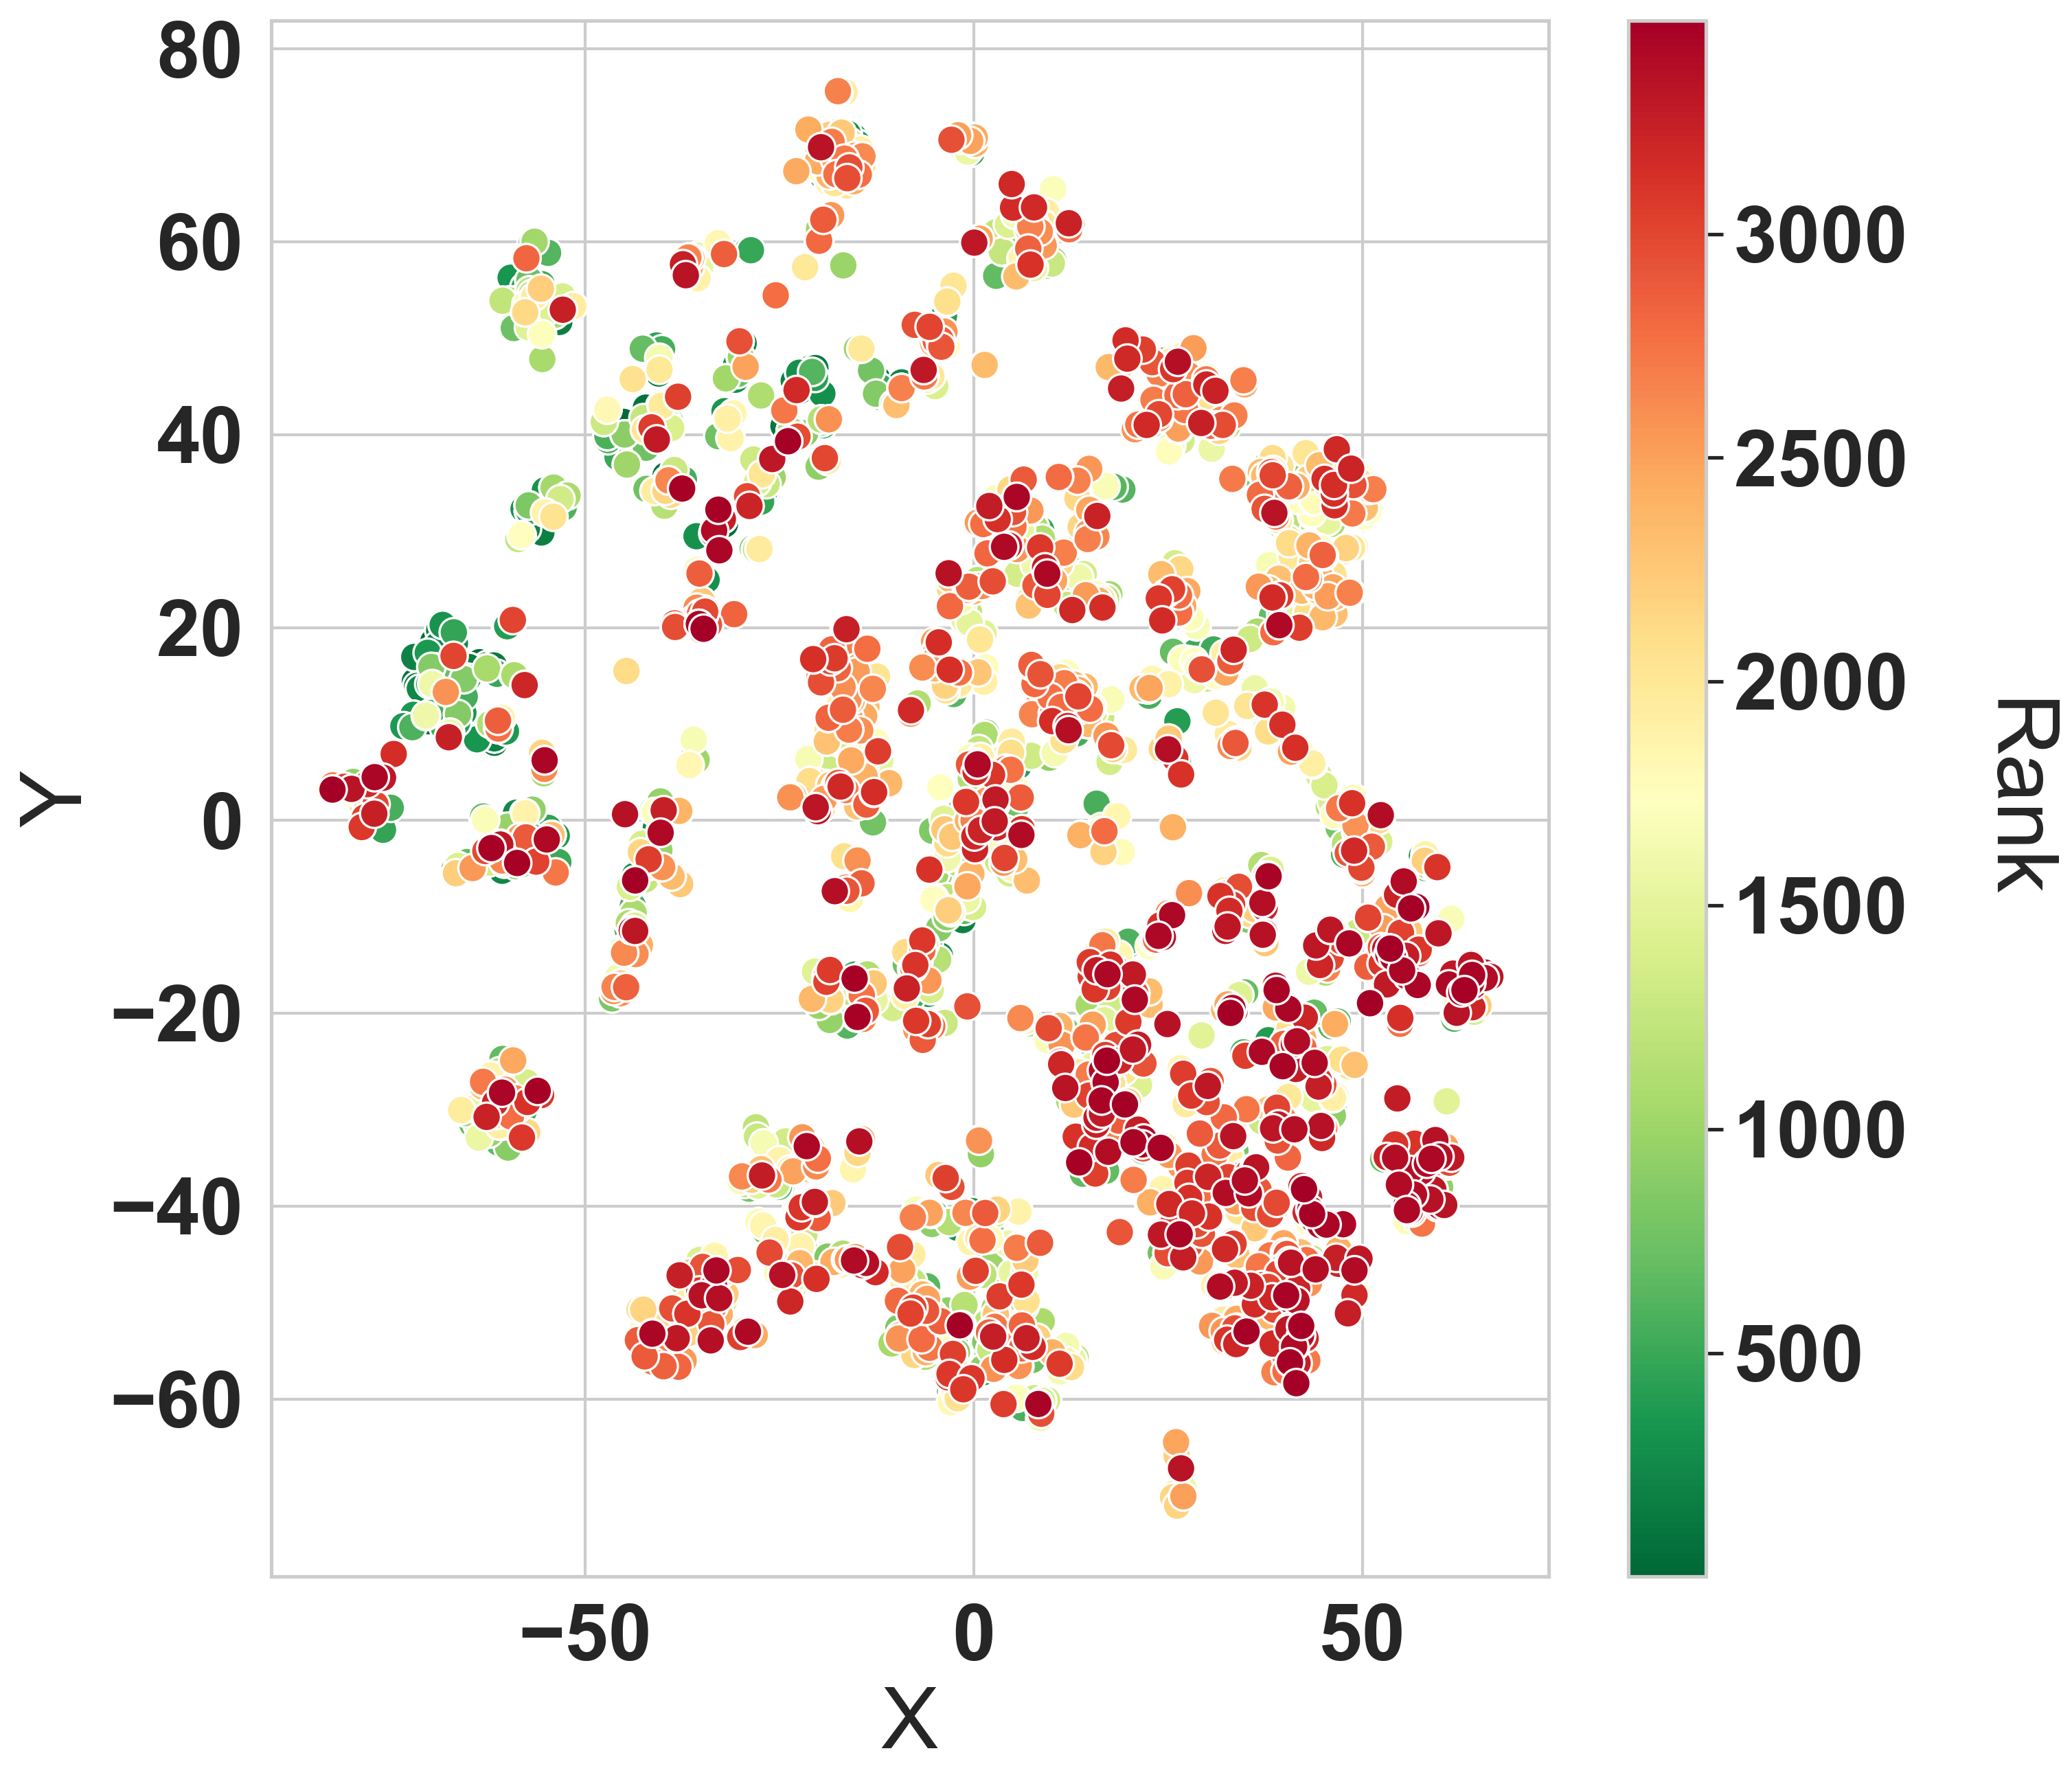

In [42]:
norm = plt.Normalize(basis_hbd['RANK'].min(), basis_hbd['RANK'].max())
sm = plt.cm.ScalarMappable(cmap="RdYlGn_r", norm=norm)

sm.set_array([])


ax = sns.scatterplot(data=original_tsne_df,x="X",y="Y", hue = 'rank', palette = "RdYlGn_r", legend = False, s = 100 )


cbar = plt.colorbar(sm)
cbar.set_label('Rank', rotation = 270, labelpad = 50)

plt.savefig('original_hbd_basis_set_ranked_dissertation.png')
plt.show()